In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
def walk_through_dir(dir_path):
    for dirpath, dir_names, filenames in os.walk(dir_path):
        print(f"There are {len(dir_names)} directories and {len(filenames)} and images in  '{dirpath}'.")

In [3]:
walk_through_dir("Vegetable Images")

There are 3 directories and 0 and images in  'Vegetable Images'.
There are 15 directories and 0 and images in  'Vegetable Images\test'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Bean'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Bitter_Gourd'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Bottle_Gourd'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Brinjal'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Broccoli'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Cabbage'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Capsicum'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Carrot'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Cauliflower'.
There are 0 directories and 200 and images in  'Vegetable Images\test\Cucumber'.
There are 0 directories and 200 and images in  'Veg

In [4]:
train_dir = "Vegetable Images/train"
test_dir = "Vegetable Images/test"
validate_dir = "Vegetable Images/validation"

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                label_mode='categorical',
                                                                image_size=(224, 224),
                                                                )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               label_mode='categorical',
                                                               image_size=(224, 224),
                                                               shuffle=False)
validate_data = tf.keras.preprocessing.image_dataset_from_directory(directory=validate_dir,
                                                                   label_mode='categorical',
                                                                   image_size=(224, 224))

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [7]:
train_data.class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

## Data Augmentation layer

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name = "Data_Augmentation")

In [9]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = data_augmentation(x)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "Pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name = "output_layer")(x)
model = tf.keras.Model(inputs, outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 Pooling_layer (GlobalAvera  (None, 2048)              0         
 gePooling2D)                                                    
                                                             

In [11]:
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
history_1 = model.fit(train_data,
                     epochs=5,
                     validation_data=validate_data)

Epoch 1/5


469/469 [==============================] - 613s 1s/step - loss: 0.2504 - accuracy: 0.9377 - val_loss: 0.0426 - val_accuracy: 0.9900
Epoch 2/5
469/469 [==============================] - 638s 1s/step - loss: 0.0546 - accuracy: 0.9875 - val_loss: 0.0236 - val_accuracy: 0.9953
Epoch 3/5
469/469 [==============================] - 664s 1s/step - loss: 0.0361 - accuracy: 0.9905 - val_loss: 0.0203 - val_accuracy: 0.9947
Epoch 4/5
469/469 [==============================] - 682s 1s/step - loss: 0.0268 - accuracy: 0.9929 - val_loss: 0.0132 - val_accuracy: 0.9957
Epoch 5/5
469/469 [==============================] - 694s 1s/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0103 - val_accuracy: 0.9963


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 Pooling_layer (GlobalAvera  (None, 2048)              0         
 gePooling2D)                                                    
                                                             

In [13]:
for layer_number, layer in enumerate(model.layers):
    print(layer_number, layer.name)

0 input_layer
1 rescaling
2 Data_Augmentation
3 resnet50v2
4 Pooling_layer
5 output_layer


In [14]:
predict_1 = model.predict(test_data)
predict_1

94/94 [==============================] - 102s 1s/step


array([[9.9684060e-01, 1.7407835e-10, 3.6661413e-06, ..., 9.6883923e-09,
        3.3776923e-09, 1.2188503e-08],
       [9.9996567e-01, 3.2765097e-08, 6.6762688e-08, ..., 1.2313268e-10,
        9.0547485e-07, 1.0429133e-09],
       [9.9999940e-01, 4.8824219e-11, 6.8818257e-11, ..., 9.3818393e-09,
        5.6781025e-12, 3.0988703e-12],
       ...,
       [2.1882755e-10, 7.3441878e-12, 5.9403589e-09, ..., 2.9734045e-12,
        2.2509657e-07, 9.9999964e-01],
       [2.7972874e-06, 2.3426992e-08, 8.1576042e-07, ..., 5.3608172e-05,
        2.8279785e-06, 9.9900383e-01],
       [3.3539698e-06, 4.5067384e-08, 2.7031369e-06, ..., 7.1439348e-07,
        7.7109782e-08, 8.7597233e-01]], dtype=float32)

In [15]:
predict_1.shape

(3000, 15)

In [17]:
# What does the first probability looks like?
print(f"Number of prediction probabilities for sample: {len(predict_1[0])}")
print(f"What prediction probability sample 0 look like: \n{predict_1[0]}")
print(f"The class with the highest probability by the model for sample 0: \n{predict_1[0].argmax()}")
print(f"The class name sample 0 belongs to: \n{test_data.class_names[predict_1[0].argmax()]}")

Number of prediction probabilities for sample: 15
What prediction probability sample 0 look like: 
[9.96840596e-01 1.74078349e-10 3.66614131e-06 6.90624915e-07
 4.25420779e-07 1.91463165e-10 2.02025601e-11 1.76556374e-11
 1.12173595e-08 3.15450504e-03 1.49680355e-11 2.12736924e-12
 9.68839231e-09 3.37769235e-09 1.21885027e-08]
The class with the highest probability by the model for sample 0: 
0
The class name sample 0 belongs to: 
Bean


## Plot Accuracy & Val_Accuracy for further evalution

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

Text(0, 0.5, 'Accuracy')

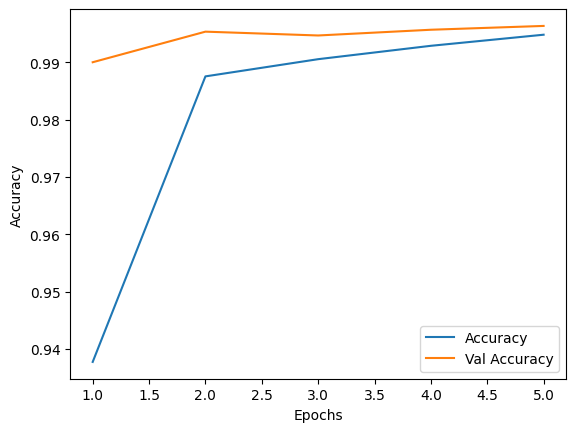

In [20]:
q = len(history_1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1, 1+q), y = history_1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1, 1+q), y = history_1.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [21]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax()) # currently test labels look like [0, 0,0, 1, 0 , 0]we need to find the 1
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
pred_classes = predict_1.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
print(classification_report(y_true = y_labels,
                           y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       200
           1       1.00      0.99      0.99       200
           2       1.00      1.00      1.00       200
           3       0.99      0.99      0.99       200
           4       0.99      0.99      0.99       200
           5       1.00      0.99      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       200
           9       0.99      0.98      0.98       200
          10       0.98      1.00      0.99       200
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       200
          13       1.00      1.00      1.00       200
          14       1.00      0.98      0.99       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

In [25]:
accuracy = accuracy_score(y_labels, pred_classes)
accuracy

0.9953333333333333

## Find out the most wrong prediction

In [27]:
filepaths = []
for filepath in test_data.list_files("Vegetable Images/test/*/*.jpg",
                                    shuffle=False):
    filepaths.append(filepath.numpy())
filepaths[:10]

[b'Vegetable Images\\test\\Bean\\0001.jpg',
 b'Vegetable Images\\test\\Bean\\0002.jpg',
 b'Vegetable Images\\test\\Bean\\0003.jpg',
 b'Vegetable Images\\test\\Bean\\0004.jpg',
 b'Vegetable Images\\test\\Bean\\0005.jpg',
 b'Vegetable Images\\test\\Bean\\0006.jpg',
 b'Vegetable Images\\test\\Bean\\0007.jpg',
 b'Vegetable Images\\test\\Bean\\0008.jpg',
 b'Vegetable Images\\test\\Bean\\0009.jpg',
 b'Vegetable Images\\test\\Bean\\0010.jpg']

In [28]:
pred_df = pd.DataFrame({"img_path": filepaths,
                       "y_true" : y_labels,
                       "y_pred": pred_classes,
                       "pred_conf": predict_1.max(axis=1), #get the maximum prediction probability value
                       "y_true_classname": [test_data.class_names[i] for i in y_labels],
                       "y_pred_classname": [test_data.class_names[i] for i in pred_classes]})

In [29]:
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'Vegetable Images\\test\\Bean\\0001.jpg',0,0,0.996841,Bean,Bean
1,b'Vegetable Images\\test\\Bean\\0002.jpg',0,0,0.999966,Bean,Bean
2,b'Vegetable Images\\test\\Bean\\0003.jpg',0,0,0.999999,Bean,Bean
3,b'Vegetable Images\\test\\Bean\\0004.jpg',0,0,0.999984,Bean,Bean
4,b'Vegetable Images\\test\\Bean\\0005.jpg',0,0,0.998376,Bean,Bean
...,...,...,...,...,...,...
2995,b'Vegetable Images\\test\\Tomato\\1196.jpg',14,14,0.765927,Tomato,Tomato
2996,b'Vegetable Images\\test\\Tomato\\1197.jpg',14,14,0.999947,Tomato,Tomato
2997,b'Vegetable Images\\test\\Tomato\\1198.jpg',14,14,1.000000,Tomato,Tomato
2998,b'Vegetable Images\\test\\Tomato\\1199.jpg',14,14,0.999004,Tomato,Tomato


In [30]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'Vegetable Images\\test\\Bean\\0001.jpg',0,0,0.996841,Bean,Bean,True
1,b'Vegetable Images\\test\\Bean\\0002.jpg',0,0,0.999966,Bean,Bean,True
2,b'Vegetable Images\\test\\Bean\\0003.jpg',0,0,0.999999,Bean,Bean,True
3,b'Vegetable Images\\test\\Bean\\0004.jpg',0,0,0.999984,Bean,Bean,True
4,b'Vegetable Images\\test\\Bean\\0005.jpg',0,0,0.998376,Bean,Bean,True


In [31]:
pred_df[pred_df["pred_correct"] == False]

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
289,b'Vegetable Images\\test\\Bitter_Gourd\\1290.jpg',1,4,0.930329,Bitter_Gourd,Broccoli,False
325,b'Vegetable Images\\test\\Bitter_Gourd\\1326.jpg',1,9,0.959035,Bitter_Gourd,Cucumber,False
729,b'Vegetable Images\\test\\Brinjal\\1123.jpg',3,10,0.813174,Brinjal,Papaya,False
878,b'Vegetable Images\\test\\Broccoli\\1079.jpg',4,0,0.559185,Broccoli,Bean,False
976,b'Vegetable Images\\test\\Broccoli\\1177.jpg',4,0,0.772919,Broccoli,Bean,False
1104,b'Vegetable Images\\test\\Cabbage\\1101.jpg',5,8,0.561238,Cabbage,Cauliflower,False
1652,b'Vegetable Images\\test\\Cauliflower\\1101.jpg',8,9,0.984902,Cauliflower,Cucumber,False
1833,b'Vegetable Images\\test\\Cucumber\\1034.jpg',9,10,0.860495,Cucumber,Papaya,False
1841,b'Vegetable Images\\test\\Cucumber\\1042.jpg',9,10,0.555399,Cucumber,Papaya,False
1843,b'Vegetable Images\\test\\Cucumber\\1044.jpg',9,10,0.934666,Cucumber,Papaya,False


In [33]:
pred_df[pred_df["pred_correct"] == False].shape[0]

14